# Pinguin VS Turtle - Deep Learning

## Project Overview

572 gambar unik yang berisi pinguin dan kura kura, dibagi menjadi folder pelatihan berisi 500 gambar dan folder validasi berisi 72 gambar. Set data dibagi 50:50 antara gambar kura-kura dan penguin. Setiap gambar berisi tepat satu contoh objek.

Tujuannya untuk dapat membuat model yang dapat mengklasifikasi pinguin dan kura kura secara tepat menggunakan deep learning & transfer learning

## IMPORT DATA & MODULE

### Load data menggunakan API KAGGLE

In [1]:
# C:\Users\USER\.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syahmisajid12","key":"**********************"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

#### Load Data dari Kaggle

In [3]:
!kaggle datasets download -d abbymorgan/penguins-vs-turtles

 24% 5.00M/20.7M [00:00<00:00, 30.1MB/s]
100% 20.7M/20.7M [00:00<00:00, 90.2MB/s]


#### Import Module

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Function

In [8]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir, view_random_images,pred_and_plot, load_and_prep_image

--2023-06-25 13:32:23--  https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  11.22K  --.-KB/s    in 0.001s  

2023-06-25 13:32:23 (10.8 MB/s) - ‘helper_functions.py.1’ saved [11485/11485]



## Data Pre-Processing

### Explore Data

In [6]:
unzip_data("/content/penguins-vs-turtles.zip")

In [11]:
walk_through_dir("/content/train")

There are 1 directories and 0 images in '/content/train'.
There are 0 directories and 500 images in '/content/train/train'.


Data train berjumlah 500


In [12]:
walk_through_dir("/content/valid")

There are 1 directories and 0 images in '/content/valid'.
There are 0 directories and 72 images in '/content/valid/valid'.


Data train berjumlah 72

In [64]:
train_dir = '/content/train/'

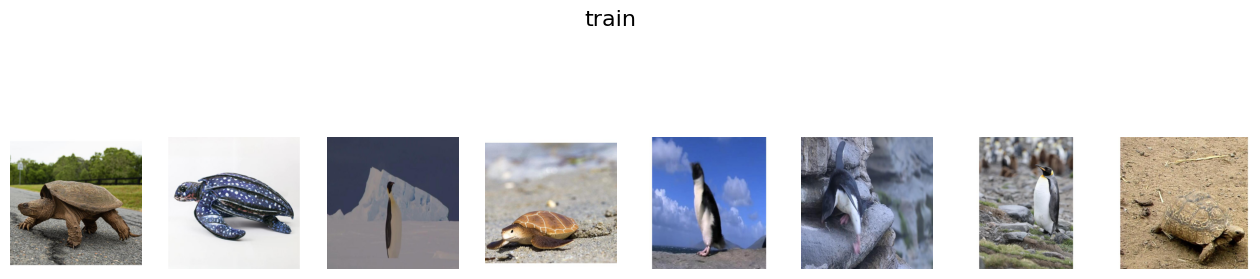

In [14]:
# View a random image from the training dataset
img = view_random_images(target_dir=train_dir,
                        target_class="train",
                        num_images = 8)

### Preparation Data

In [15]:
train_anno=pd.read_json('/content/train_annotations')
train_anno.head()

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[119, 25, 205, 606]",124230,[],0
1,1,1,1,"[131, 82, 327, 440]",143880,[],0
2,2,2,2,"[225, 298, 198, 185]",36630,[],0
3,3,3,2,"[468, 109, 172, 193]",33196,[],0
4,4,4,1,"[14, 242, 611, 154]",94094,[],0


In [16]:
val_anno=pd.read_json('/content/valid_annotations')
val_anno.head()

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[227, 93, 298, 525]",156450,[],0
1,1,1,2,"[211, 198, 428, 259]",110852,[],0
2,2,2,2,"[0, 243, 512, 267]",136704,[],0
3,3,3,1,"[128, 178, 457, 354]",161778,[],0
4,4,4,1,"[168, 131, 296, 469]",138824,[],0


Lihat variabel target

In [17]:
print('Classes of train_anno: ', train_anno['category_id'].unique())
print('Classes of val_anno: ', val_anno['category_id'].unique())

Classes of train_anno:  [1 2]
Classes of val_anno:  [1 2]


Drop feature yang tidak diperlukan

In [18]:
train_anno.drop(['id', 'bbox', 'area', 'segmentation', 'iscrowd'], axis =1, inplace=True)
val_anno.drop(['id', 'bbox', 'area', 'segmentation', 'iscrowd'], axis =1, inplace=True)

Menggubah nama variabel target

In [19]:
train_anno['category_id']=train_anno['category_id'].replace({1:'Penguin',2:'Turtle'})
val_anno['category_id']=val_anno['category_id'].replace({1:'Penguin',2:'Turtle'})

In [20]:
train_anno.columns=['filepaths', 'labels']
val_anno.columns=['filepaths', 'labels']

In [137]:
val_anno.head(20)

,filepaths,labels
0,/content/valid/valid/image_id_000.jpg,Penguin
1,/content/valid/valid/image_id_001.jpg,Turtle
2,/content/valid/valid/image_id_002.jpg,Turtle
3,/content/valid/valid/image_id_003.jpg,Penguin
4,/content/valid/valid/image_id_004.jpg,Penguin
5,/content/valid/valid/image_id_005.jpg,Penguin
6,/content/valid/valid/image_id_006.jpg,Turtle
7,/content/valid/valid/image_id_007.jpg,Penguin
8,/content/valid/valid/image_id_008.jpg,Penguin
9,/content/valid/valid/image_id_009.jpg,Penguin


In [22]:
import os
# now in the filepaths column create the full path to the image file
train_image_dir=r'/content/train/train'
train_imglist=sorted(os.listdir(train_image_dir))
train_paths=[]
for i in range (len(train_imglist)):
    train_paths.append(os.path.join(train_image_dir, train_imglist[i]))
print (train_paths[0])

/content/train/train/image_id_000.jpg


In [23]:
# now in the train_anno filepaths column insert the full filepath
train_anno['filepaths']=train_paths
train_anno

,filepaths,labels
0,/content/train/train/image_id_000.jpg,Penguin
1,/content/train/train/image_id_001.jpg,Penguin
2,/content/train/train/image_id_002.jpg,Turtle
3,/content/train/train/image_id_003.jpg,Turtle
4,/content/train/train/image_id_004.jpg,Penguin
...,...,...
495,/content/train/train/image_id_495.jpg,Turtle
496,/content/train/train/image_id_496.jpg,Penguin
497,/content/train/train/image_id_497.jpg,Penguin
498,/content/train/train/image_id_498.jpg,Penguin


In [24]:
# now in the filepaths column create the full path to the image file
val_image_dir=r'/content/valid/valid'
val_imglist=sorted(os.listdir(val_image_dir))
val_paths=[]
for i in range (len(val_imglist)):
    val_paths.append(os.path.join(val_image_dir, val_imglist[i]))
print (val_paths[0])

/content/valid/valid/image_id_000.jpg


In [25]:
# now in the train_anno filepaths column insert the full filepath
val_anno['filepaths']=val_paths
val_df = val_anno
val_df

,filepaths,labels
0,/content/valid/valid/image_id_000.jpg,Penguin
1,/content/valid/valid/image_id_001.jpg,Turtle
2,/content/valid/valid/image_id_002.jpg,Turtle
3,/content/valid/valid/image_id_003.jpg,Penguin
4,/content/valid/valid/image_id_004.jpg,Penguin
...,...,...
67,/content/valid/valid/image_id_067.jpg,Turtle
68,/content/valid/valid/image_id_068.jpg,Penguin
69,/content/valid/valid/image_id_069.jpg,Penguin
70,/content/valid/valid/image_id_070.jpg,Turtle


### Split Data

In [26]:
from sklearn.model_selection import train_test_split

# lets create a test data frame by splitting the train_anno dataframe into a train dataframe and a test data frame
train_df, test_df=train_test_split(train_anno, train_size=.8, shuffle=True, random_state=123,
                                   stratify=train_anno['labels'])
print ('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  val_df length: ', len(val_df))

train_df length:  400   test_df length:  100   val_df length:  72


In [27]:
# lets check the balance of labels in the dataset
balance= list(train_df['labels'].value_counts())
balance

[200, 200]

### Generate Data

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# the train set is balance and has an adequate number of images for classification
# lets create generators for the three dataframes
img_size=(224,224) # image size
bs=40 # batch size

t_gen=ImageDataGenerator(horizontal_flip=True) # generator for training

gen=ImageDataGenerator() # generator for validation and test

train_gen=t_gen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   color_mode='rgb',batch_size=bs, shuffle=True, seed=123,
                                   class_mode= 'categorical')

val_gen=gen.flow_from_dataframe(val_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   color_mode='rgb',batch_size=bs, shuffle=False, seed=123,
                                   class_mode= 'categorical')

test_gen=gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   color_mode='rgb',batch_size=bs, shuffle=False, seed=123,
                                   class_mode= 'categorical')

Found 400 validated image filenames belonging to 2 classes.
Found 72 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.


## Modelling

### Model 1

In [59]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Adamax

inputs = Input(shape=(224, 224, 3))

x = Conv2D(16, 3, activation='relu')(inputs)
x = Conv2D(16, 3, activation='relu')(x)
x = Dropout(0.5)(x)
x = MaxPool2D()(x)

x = Conv2D(32, 3, activation='relu')(x)
x = Conv2D(32, 3, activation='relu')(x)
x = Dropout(0.5)(x)
x = MaxPool2D()(x)

x = Flatten()(x)
outputs = Dense(1, activation='sigmoid')(x)

model_1 = Model(inputs=inputs, outputs=outputs)

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# model_1.compile(optimizer=Adamax(learning_rate=.001),
#                 loss='binary_crossentropy',
#                 metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_gen,
                        epochs=20,
                        # steps_per_epoch=len(train_data),
                        validation_data=val_gen,
                        # validation_steps=len(validation_data)
                        )

Epoch 1/20
10/10 [==============================] - 5s 345ms/step - loss: 144.5090 - accuracy: 0.5000 - val_loss: 6.8024 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 4s 384ms/step - loss: 4.9738 - accuracy: 0.5000 - val_loss: 0.7158 - val_accuracy: 0.5000
Epoch 3/20
10/10 [==============================] - 3s 316ms/step - loss: 0.7885 - accuracy: 0.5000 - val_loss: 0.6998 - val_accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 3s 321ms/step - loss: 0.7167 - accuracy: 0.5000 - val_loss: 0.6979 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 6s 606ms/step - loss: 0.7063 - accuracy: 0.5000 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 6/20
10/10 [==============================] - 5s 468ms/step - loss: 0.6995 - accuracy: 0.5000 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 7/20
10/10 [==============================] - 4s 405ms/step - loss: 0.6985 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoc

In [40]:
# Evaluate on the test data
result_1 = model_1.evaluate(val_gen)

2/2 [==============================] - 1s 205ms/step - loss: 0.6934 - accuracy: 0.5000


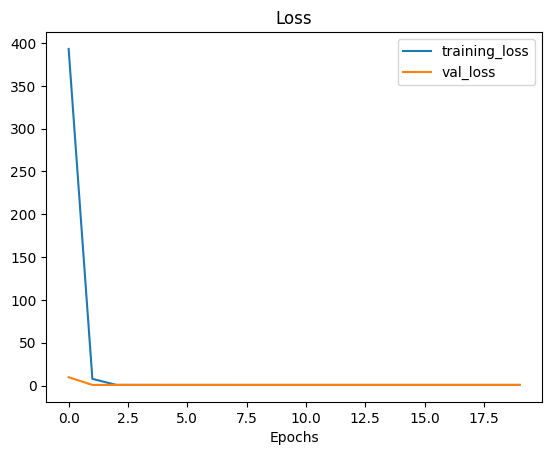

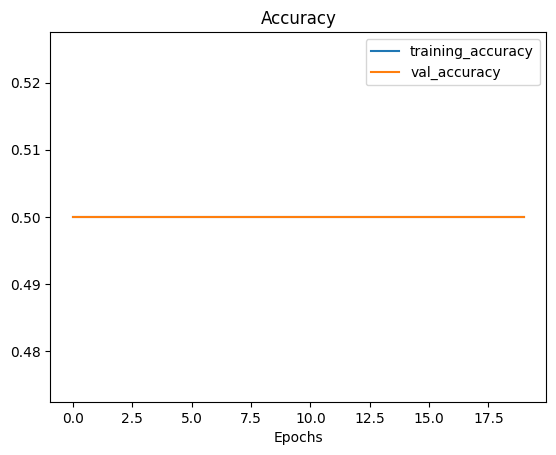

In [41]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_1)

### Model 2

In [138]:
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.models import Model

# I will use transfer learning using the EfficientNetB0 model
class_count=2 # number of classes
lr= .001 # learning rate
img_shape=(224,224,3) # shape of color images
base_model=tf.keras.applications.EfficientNetV2B0(include_top=False, weights="imagenet",
                                                   input_shape=img_shape, pooling='max')
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.4, seed=123)(x)
output=Dense(class_count, activation='sigmoid')(x)
model2=Model(inputs=base_model.input, outputs=output)
model2.compile(Adamax(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

In [139]:
# lets define 2 callbacks , reduce learning rate on plateau and early stopping
rlronp=tf.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.4,  patience=2,
                                            verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4,restore_best_weights=True)
callbacks=[rlronp, estop]

In [140]:
# now lets train the model
epochs=20
history_2=model2.fit(x=train_gen,   epochs=epochs, verbose=1, callbacks=callbacks,  validation_data=val_gen,
                   validation_steps=None,  shuffle=True,  initial_epoch=0) # train the model

Epoch 1/20
10/10 [==============================] - 50s 676ms/step - loss: 7.5205 - accuracy: 0.8825 - val_loss: 8.3830 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 5s 477ms/step - loss: 6.4009 - accuracy: 0.9875 - val_loss: 6.9216 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - 4s 384ms/step - loss: 5.5468 - accuracy: 0.9950 - val_loss: 5.7233 - val_accuracy: 0.9306 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - 5s 472ms/step - loss: 4.8136 - accuracy: 0.9975 - val_loss: 4.8594 - val_accuracy: 0.9306 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - 4s 381ms/step - loss: 4.2035 - accuracy: 0.9900 - val_loss: 4.2155 - val_accuracy: 0.9028 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - 4s 394ms/step - loss: 3.6871 - accuracy: 1.0000 - val_loss: 3.6901 - val_accuracy: 0.9028 - lr: 0.0010
Epoch 7/20
10/10 [==============================] - 5s 490ms/step - l

In [141]:
# Evaluate on the test data
result_2 = model2.evaluate(val_gen)

2/2 [==============================] - 1s 297ms/step - loss: 1.0167 - accuracy: 0.9167


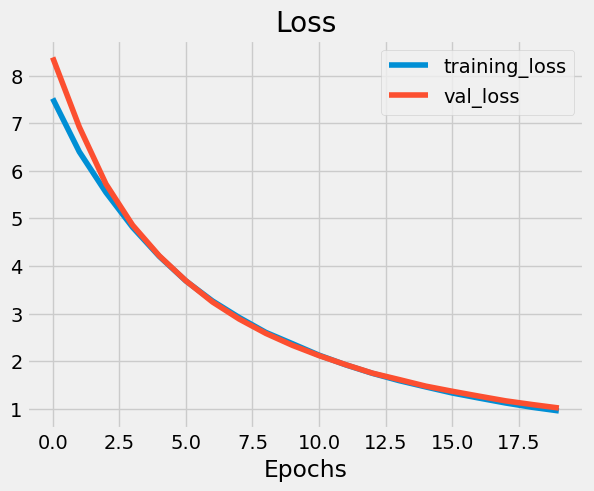

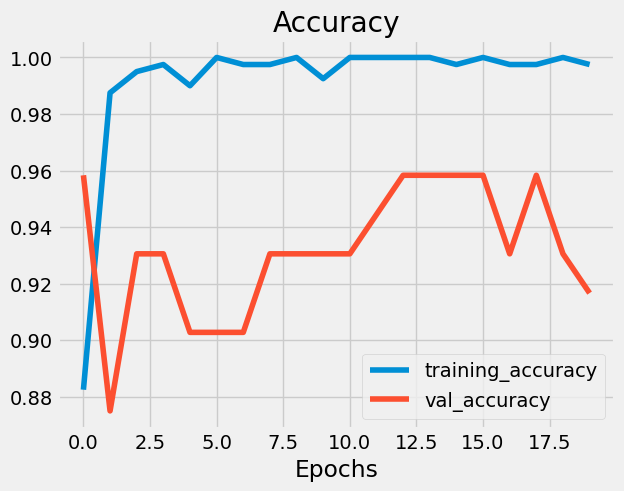

In [142]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_2)

2/2 [==============================] - 2s 197ms/step
There were 6 errors in 72 tests for an accuracy of  91.67 and an F1 score of  91.61


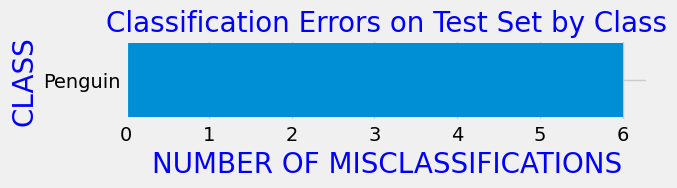

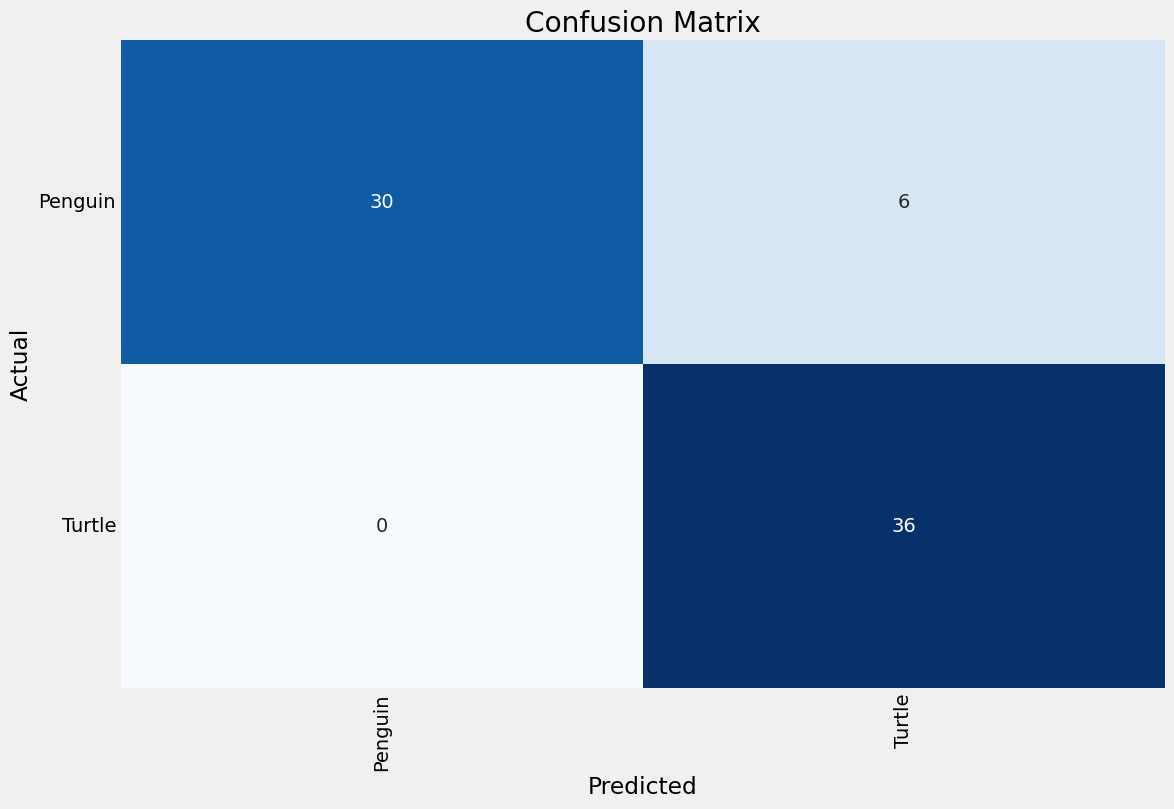

Classification Report:
----------------------
               precision    recall  f1-score   support

     Penguin     1.0000    0.8333    0.9091        36
      Turtle     0.8571    1.0000    0.9231        36

    accuracy                         0.9167        72
   macro avg     0.9286    0.9167    0.9161        72
weighted avg     0.9286    0.9167    0.9161        72



In [143]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

# we ended up with a validation accuracy of 97.2 % so the model is performing well
# lets make predictions on the test set and produce a confusion matrix and a classification report
def predictor(model,test_gen):
    classes=list(test_gen.class_indices.keys())
    class_count=len(classes)
    preds=model.predict(test_gen, verbose=1)
    errors=0
    test_count =len(preds)
    misclassified_classes=[]
    misclassified_files=[]
    misclassified_as = []
    pred_indices=[]
    for i, p in enumerate (preds):
        pred_index=np.argmax(p)
        pred_indices.append(pred_index)
        true_index= test_gen.labels[i]
        if  pred_index != true_index:
            errors +=1
            misclassified_classes.append(classes[true_index])
            misclassified_as.append(classes[pred_index])
            file=test_gen.filenames[i]
            split=file.split('/')
            L=len(split)
            f=split[L-2] +' '+ split[L-1]
            misclassified_files.append(f)

    accuracy = (test_count-errors)*100/test_count
    ytrue=np.array(test_gen.labels)
    ypred=np.array(pred_indices)
    f1score=f1_score(ytrue, ypred, average='weighted')* 100
    msg=f'There were {errors} errors in {test_count} tests for an accuracy of {accuracy:6.2f} and an F1 score of {f1score:6.2f}'
    print (msg)
    misclassified_classes=sorted(misclassified_classes)
    if len(misclassified_classes) > 0:
        misclassifications=[]
        for klass in misclassified_classes:
            mis_count=misclassified_classes.count(klass)
            misclassifications.append(mis_count)
        unique=len(np.unique(misclassified_classes))
        if unique==1:
            height=int(unique)
        else:
            height =int(unique/2)
        plt.figure(figsize=(6, height))
        plt.style.use('fivethirtyeight')
        plt.barh(misclassified_classes, misclassifications )
        plt.title( 'Classification Errors on Test Set by Class', fontsize=20, color='blue')
        plt.xlabel('NUMBER OF MISCLASSIFICATIONS', fontsize=20, color='blue')
        plt.ylabel('CLASS', fontsize=20, color='blue')
        plt.show()
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
        clr = classification_report(ytrue, ypred, target_names=classes, digits= 4) # create classification report
        print("Classification Report:\n----------------------\n", clr)
    return f1score, misclassified_files

f1score, misclassified_files= predictor(model2,val_gen)

## Evaluation

In [144]:
class_names = train_anno['labels'].unique() # created a list of class_names from the subdirectories
class_names

array(['Penguin', 'Turtle'], dtype=object)

In [145]:
print(f"Akurasi Base Model = {result_1[1]}")
print(f"Akurasi Efficientnet = {result_2[1]}")

Akurasi Base Model = 0.5
Akurasi Efficientnet = 0.9166666865348816


1/1 [==============================] - 0s 120ms/step


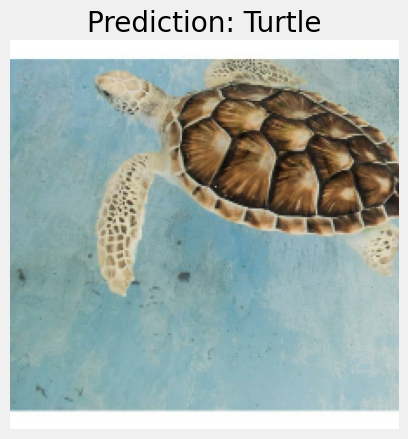

In [148]:
pred_and_plot(model=model2,
              filename="/content/valid/valid/image_id_012.jpg",
              class_names=class_names)